In [1]:
import cv2
import numpy as np
import utils.main_pipeline as main
import utils.br_pipeline as br
import utils.me_pipeline as me
import utils.transform as transform
import utils.inferencia as inf
import utils.char_inference as charinf
import utils.char_inf_torch as chartorch

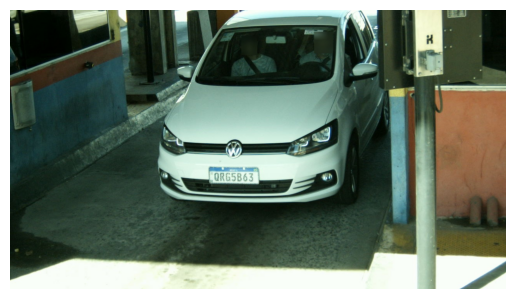

('QRG5B63', np.float32(0.52325284))

In [2]:
imgpath = 'datasets/dataset1/bruto/cars-me/img_010183.jpg'
img = cv2.imread(imgpath)
main.show_image(img,True)
main.extraction_pipeline(img)

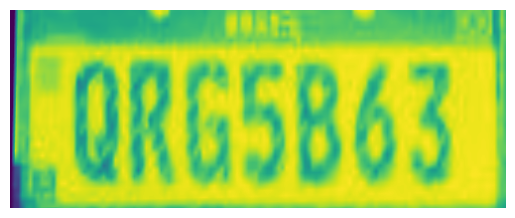

In [3]:
deteccao = main.detect_placa_onnx(main.model, img)
gray = main.grayscale(img)
croped_img = main.get_croped_image(deteccao, gray)
warped_img = main.warp_image(deteccao, croped_img)
main.show_image(warped_img)

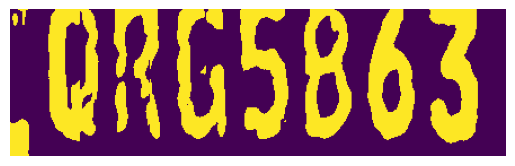

In [4]:
img = me.crop(warped_img)
placa = me.trashold(img, 35)
main.show_image(placa)

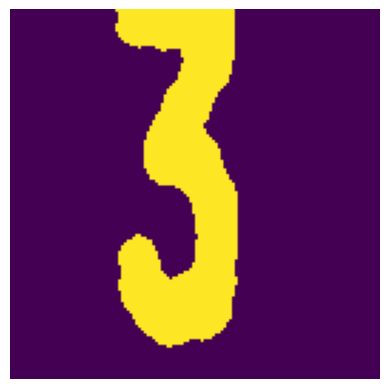

In [5]:
splited_chars = me.split_chars(placa, 7)
main.show_image(splited_chars[6])

In [6]:
letters = [me.clean_objects(splited_chars[i]) for i in me.LETRAS_INDEX]
numbers = [me.clean_objects(splited_chars[i]) for i in me.NUMEROS_INDEX]
infered_letters = chartorch.infer_characters(letters, 'letras', 'me')
infered_numbers = chartorch.infer_characters(numbers, 'numeros', 'me')
infered_numbers

[('5', np.float32(0.998604)),
 ('6', np.float32(0.9999999)),
 ('3', np.float32(0.9098916))]

In [7]:
letters = [me.clean_objects(splited_chars[i]) for i in me.LETRAS_INDEX]
numbers = [me.clean_objects(splited_chars[i]) for i in me.NUMEROS_INDEX]
infered_letters = charinf.infer_characters(letters, 'letras', 'me')
infered_numbers = charinf.infer_characters(numbers, 'numeros', 'me')
infered_numbers

[('5', np.float32(0.998604)),
 ('6', np.float32(0.9999998)),
 ('3', np.float32(0.9098914))]